In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
import warnings

warnings.filterwarnings('ignore')

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.describe(include=['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


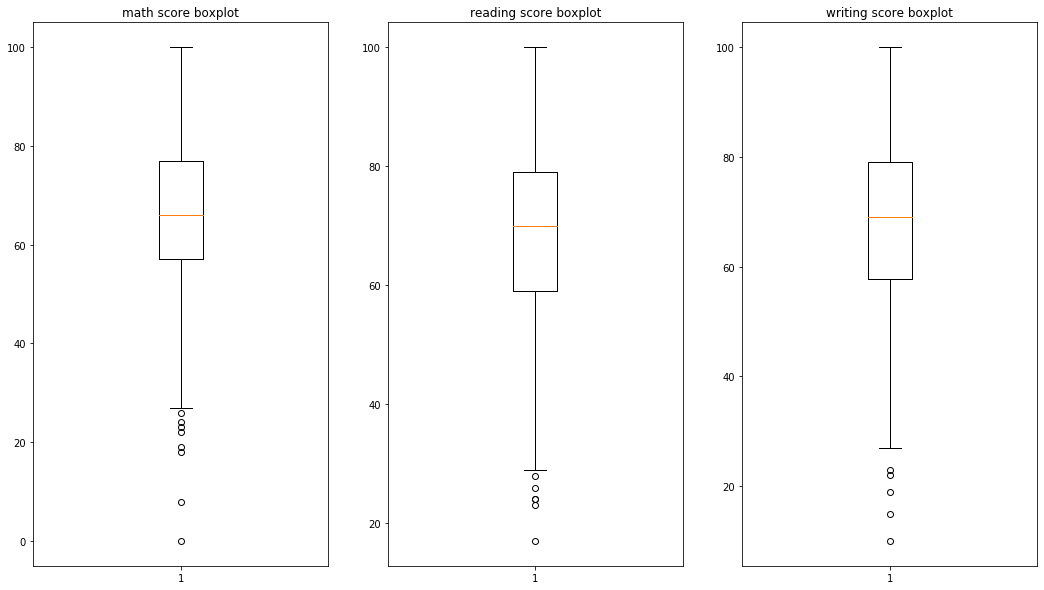

In [16]:
plt.figure(figsize=(18,10))

plt.subplot(1, 3, 1)
plt.boxplot(df["math score"])
plt.title("math score boxplot")

plt.subplot(1, 3, 2)
plt.boxplot(df["reading score"])
plt.title("reading score boxplot")

plt.subplot(1, 3, 3)
plt.boxplot(df["writing score"])
plt.title("writing score boxplot")

plt.show()

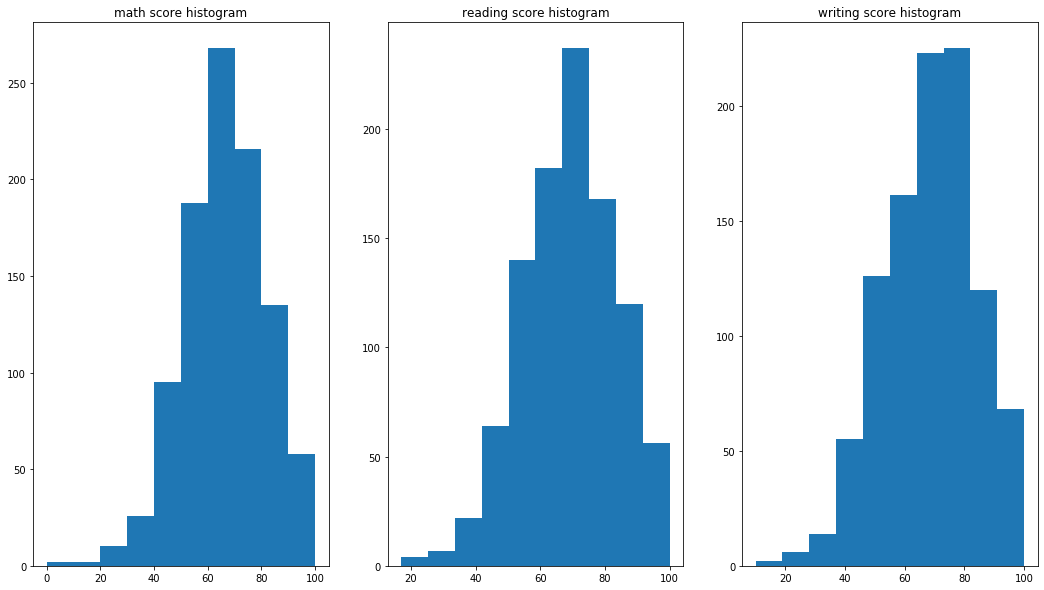

In [17]:
plt.figure(figsize=(18,10))

plt.subplot(1, 3, 1)
plt.hist(df["math score"])
plt.title("math score histogram")

plt.subplot(1, 3, 2)
plt.hist(df["reading score"])
plt.title("reading score histogram")

plt.subplot(1, 3, 3)
plt.hist(df["writing score"])
plt.title("writing score histogram")

plt.show()

In [19]:
jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


low p-values, so not normal distributions

In [27]:
math_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

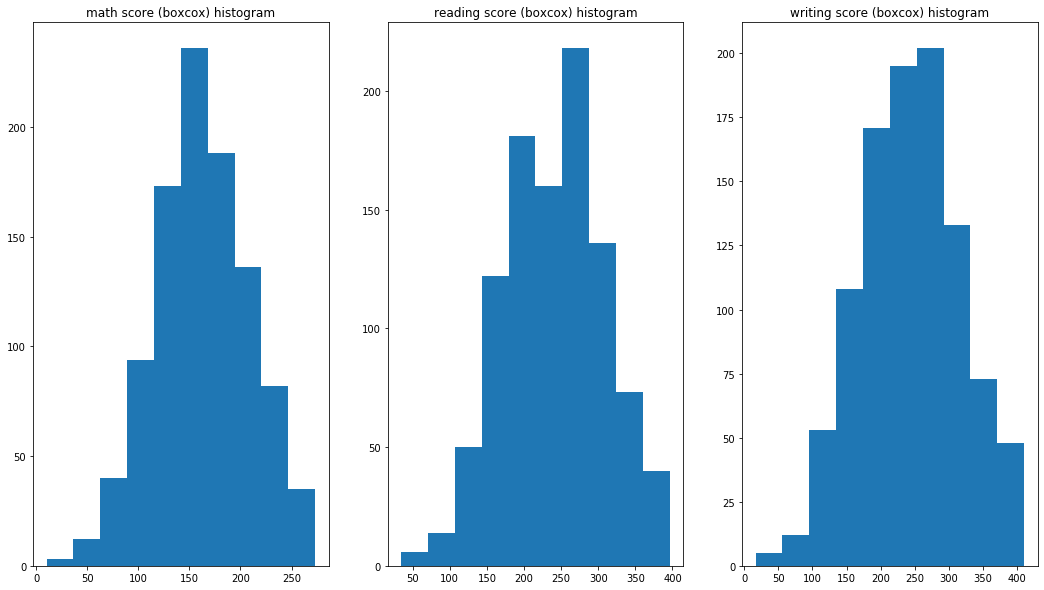

In [30]:
plt.figure(figsize=(18,10))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("math score (boxcox) histogram")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("reading score (boxcox) histogram")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("writing score (boxcox) histogram")

plt.show()

In [32]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


The p-values are higher, indicating that the distributions are closer to normal.

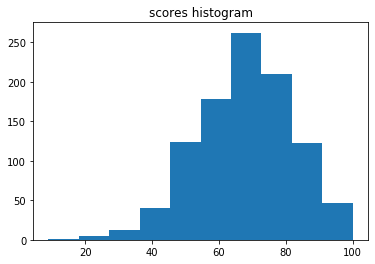

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [36]:
df["score"] = (df["math score"] + df["reading score"] + df["writing score"])/3

plt.hist(df["score"])
plt.title("scores histogram")
plt.show()

jb_stats = jarque_bera(score)
norm_stats = normaltest(score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

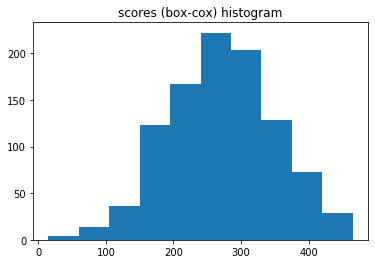

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [37]:
score_boxcox,_ = boxcox(df["score"])

plt.hist(score_boxcox)
plt.title("scores (box-cox) histogram")
plt.show()

jb_stats = jarque_bera(score_boxcox)
norm_stats = normaltest(score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The new score category was not initially normal, but is after a boxcox transformation.